In [1]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

#  Loading the dataset

In [3]:
data_path = '/kaggle/input/clustering-penguins-species/penguins.csv'
penguins_df = pd.read_csv(data_path)
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


# Data Preprocessing

In [4]:
#checking number of null values in the data
print("Number of null values before dropping:")
print(penguins_df.isnull().sum())

# Drop rows with missing values
penguins_df.dropna(inplace=True)

# Show the number of null values after dropping
print("\nNumber of null values after dropping:")
print(penguins_df.isnull().sum())


Number of null values before dropping:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Number of null values after dropping:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


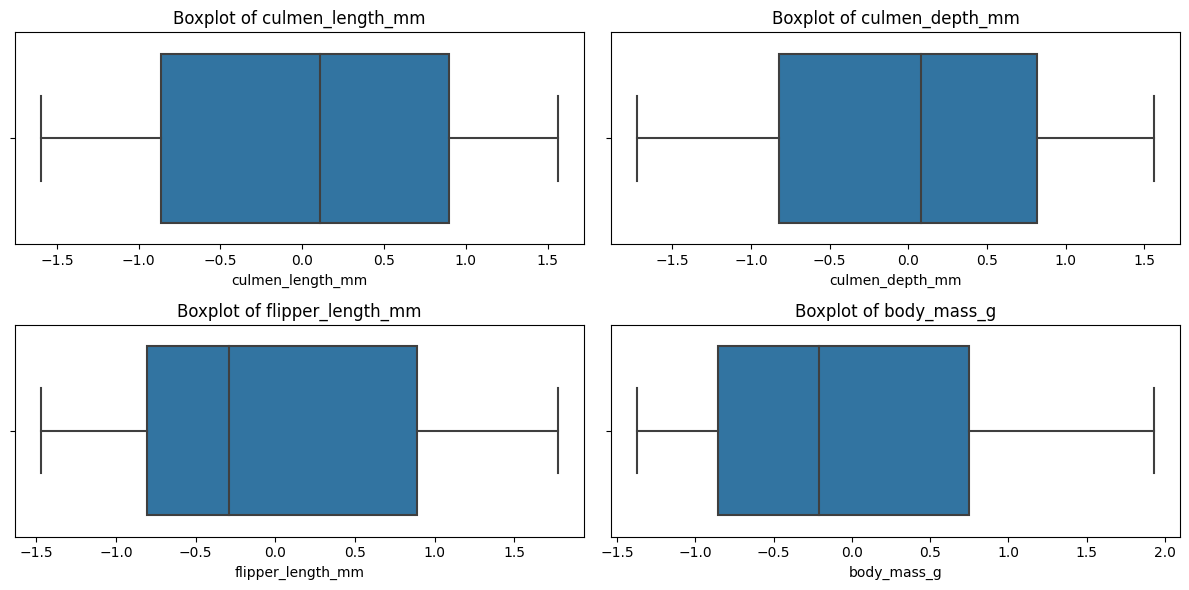

In [14]:
# Visualize boxplots for each numerical feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=penguins_df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [15]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Print the first few rows of the standardized features
print(X_scaled[:5])


[[-0.89772327  0.77726336 -0.12689335 -0.57223347]
 [-0.82426521  0.11703673 -0.10787184 -0.50992298]
 [-0.67734909  0.42175671 -0.07363312 -1.19533834]
 [-1.33847163  1.08198335 -0.08124172 -0.94609639]
 [-0.86099424  1.74220998 -0.09265463 -0.69685445]]


# Exploratory Data Analysis (EDA)

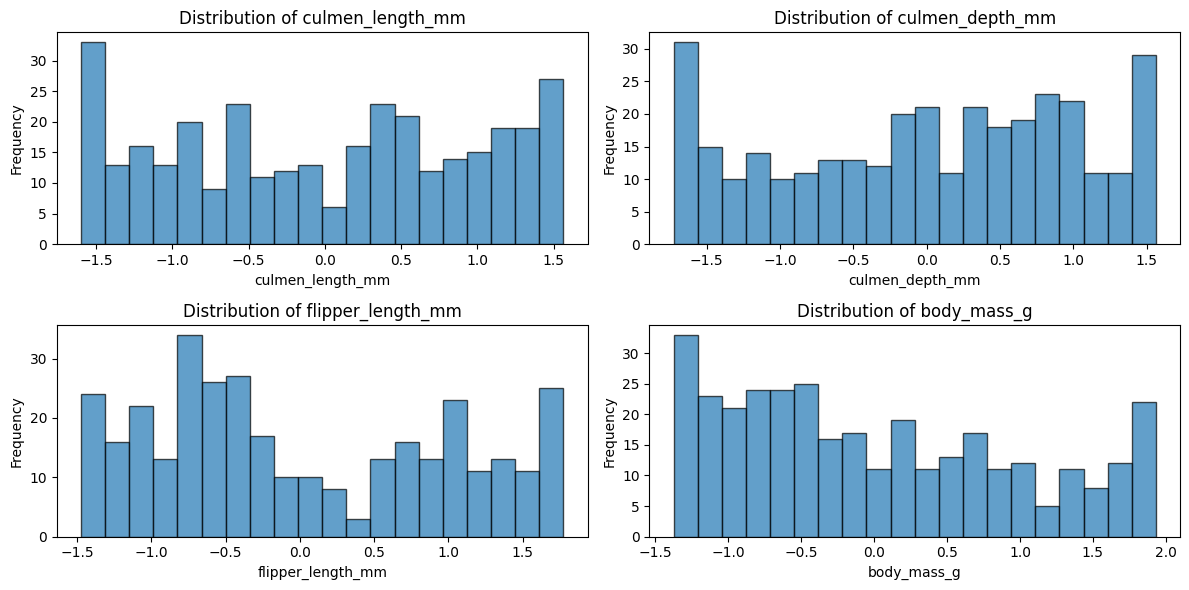

In [17]:
# Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.hist(penguins_df[feature], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

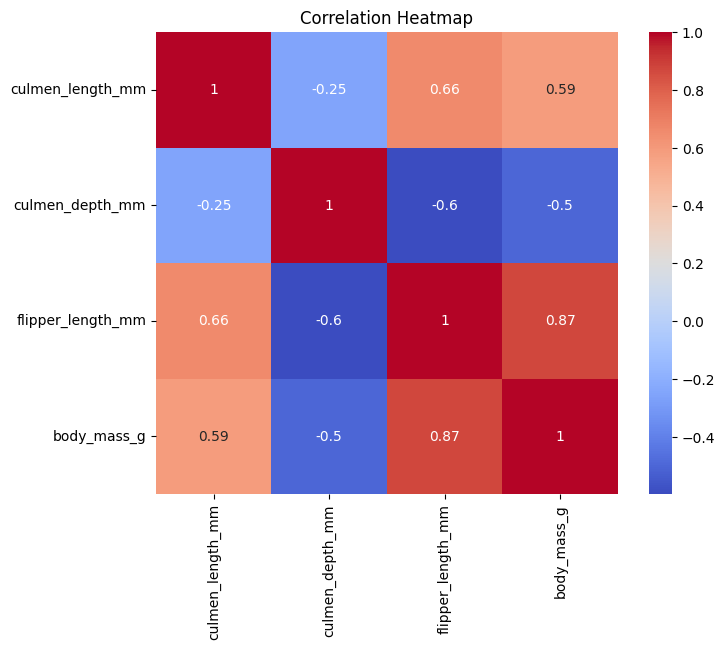

In [18]:
# Plot correlation heatmap
# Calculate feature correlations
correlation_matrix = penguins_df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Summary statistics
summary_stats = penguins_df[features].describe()
print("\nSummary statistics:\n", summary_stats)


Summary statistics:
        culmen_length_mm  culmen_depth_mm  flipper_length_mm   body_mass_g
count      3.350000e+02     3.350000e+02       3.350000e+02  3.350000e+02
mean       3.393637e-16    -2.545228e-16      -9.756706e-16  4.666251e-16
std        1.001496e+00     1.001496e+00       1.001496e+00  1.001496e+00
min       -1.598947e+00    -1.725972e+00      -1.473107e+00 -1.374618e+00
25%       -8.615954e-01    -8.240257e-01      -8.089202e-01 -8.560037e-01
50%        1.086045e-01     7.792055e-02      -2.923303e-01 -2.077360e-01
75%        8.944663e-01     8.206998e-01       8.884463e-01  7.484590e-01
max        1.563904e+00     1.563479e+00       1.774029e+00  1.931548e+00


# K-medoids Clustering

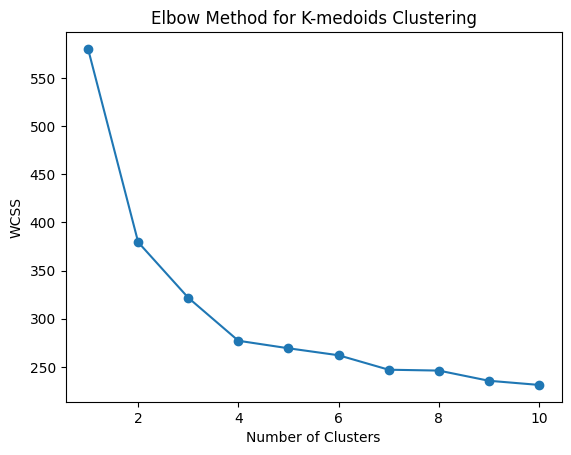

In [20]:
# Determine optimal number of clusters for K-medoids (using Elbow method)
wcss = []
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X_scaled)
    wcss.append(kmedoids.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for K-medoids Clustering')
plt.show()

In [21]:
# Choose an appropriate number of clusters 
n_clusters = 3
kmedoids_final = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids_final.fit(X_scaled)

# Assign clusters to data points
penguins_df['kmedoids_cluster'] = kmedoids_final.labels_



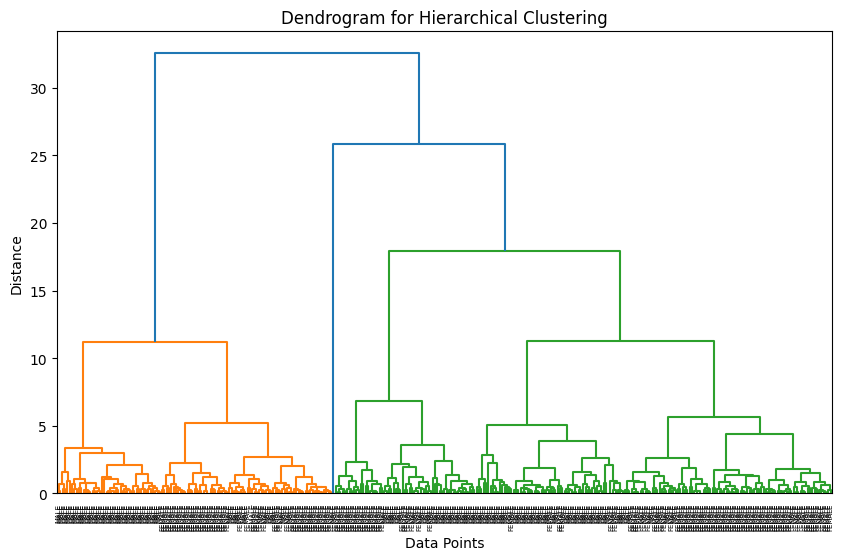

In [22]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=penguins_df['sex'].tolist())
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()



In [23]:
# Based on the structure
n_clusters_hierarchical = 3

# Assign clusters to data points
penguins_df['hierarchical_cluster'] = pd.cut(range(len(penguins_df)), bins=n_clusters_hierarchical, labels=False)

In [24]:
# Now penguins_df contains the clustering results
print(penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'kmedoids_cluster', 'hierarchical_cluster']])


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0           -0.939211         0.820700          -1.473107    -0.596697   
1           -0.861595         0.130976          -1.104114    -0.531870   
2           -0.706363         0.449310          -0.439927    -1.244964   
4           -1.404907         1.139034          -0.587525    -0.985657   
5           -0.900403         1.563479          -0.808920    -0.726350   
..                ...              ...                ...          ...   
338          0.632512        -1.725972           0.962245     0.926733   
340          0.554896        -1.513749           1.036043     0.829492   
341          1.253440        -0.770970           1.552633     1.931548   
342          0.244432        -1.248471           0.814648     1.283280   
343          1.156420        -0.558747           0.888446     1.542587   

     kmedoids_cluster  hierarchical_cluster  
0                   2                     0  
1                  

# Evaluation and Interpretation

In [25]:
# Evaluation for K-medoids clustering
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_final.labels_)
db_index_kmedoids = davies_bouldin_score(X_scaled, kmedoids_final.labels_)

print("Evaluation for K-medoids Clustering:")
print("Silhouette Score:", silhouette_kmedoids)
print("Davies-Bouldin Index:", db_index_kmedoids)

# Choose an appropriate number of clusters 
n_clusters_hierarchical = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, affinity='euclidean', linkage='ward')
hierarchical_clustering.fit(X_scaled)

# Calculate silhouette score and Davies-Bouldin index
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_clustering.labels_)
db_index_hierarchical = davies_bouldin_score(X_scaled, hierarchical_clustering.labels_)

print("\nEvaluation for Hierarchical Clustering:")
print("Silhouette Score:", silhouette_hierarchical)
print("Davies-Bouldin Index:", db_index_hierarchical)


Evaluation for K-medoids Clustering:
Silhouette Score: 0.42617744010255826
Davies-Bouldin Index: 1.0700915032035512

Evaluation for Hierarchical Clustering:
Silhouette Score: 0.49496234431753083
Davies-Bouldin Index: 0.5475006751138712


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
